# **Rede Neural com TensorFlow  - Com Personagens**

# Importação das Bibliotecas

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.14.0'

# carregamento da base de dados

In [ ]:
dataset = pd.read_csv('simpsons.csv')
dataset

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.000000,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.000000,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.000000,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.000000,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.000000,0.011593,Bart
...,...,...,...,...,...,...,...
288,0.000000,0.000000,0.000000,0.000000,6.485412,0.093921,Homer
289,0.000000,0.000000,0.000000,0.000000,0.000000,0.042194,Homer
290,0.000000,0.000000,0.000000,0.000000,4.263629,0.076761,Homer
291,0.000000,0.000000,0.000000,0.000000,1.429134,0.017013,Homer


In [ ]:
dataset.shape

(293, 7)

In [ ]:
dataset.head()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.0,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.0,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.0,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.0,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.0,0.011593,Bart


In [ ]:
dataset.tail()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
288,0.0,0.0,0.0,0.000000,6.485412,0.093921,Homer
289,0.0,0.0,0.0,0.000000,0.000000,0.042194,Homer
290,0.0,0.0,0.0,0.000000,4.263629,0.076761,Homer
291,0.0,0.0,0.0,0.000000,1.429134,0.017013,Homer
292,0.0,0.0,0.0,13.744248,0.853902,0.063546,Homer


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   laranja_camisa_bart  293 non-null    float64
 1   azul_calcao_bart     293 non-null    float64
 2   azul_sapato_bart     293 non-null    float64
 3   marrom_boca_homer    293 non-null    float64
 4   azul_calca_homer     293 non-null    float64
 5   cinza_sapato_homer   293 non-null    float64
 6   classe               293 non-null    object 
dtypes: float64(6), object(1)
memory usage: 16.1+ KB


In [ ]:
dataset.isnull().sum()

laranja_camisa_bart    0
azul_calcao_bart       0
azul_sapato_bart       0
marrom_boca_homer      0
azul_calca_homer       0
cinza_sapato_homer     0
classe                 0
dtype: int64

<Axes: xlabel='classe', ylabel='count'>

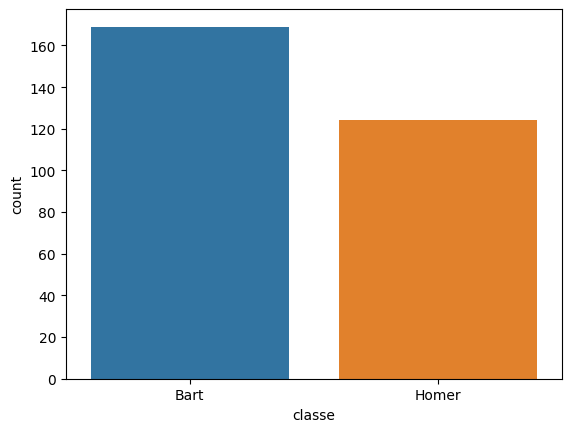

In [ ]:
sns.countplot(x = 'classe', data=dataset)

<ipython-input-9-c0a1ca8ade7e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

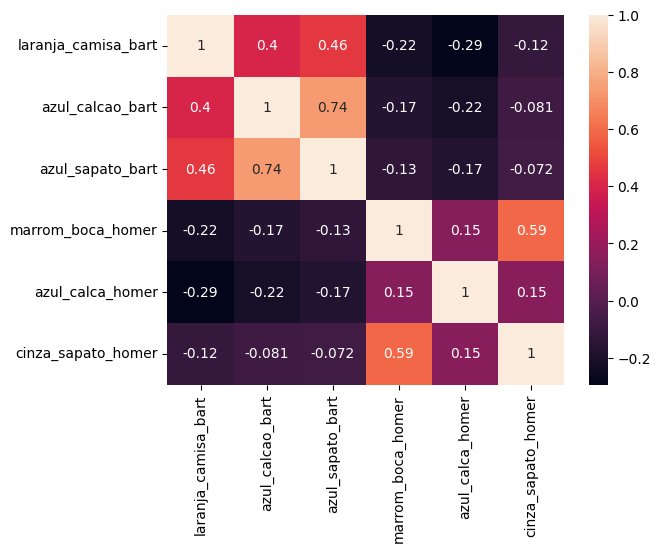

In [ ]:
sns.heatmap(dataset.corr(), annot=True)

In [ ]:
x = dataset.iloc[:, 0:6].values

In [ ]:
y = dataset.iloc[:,6].values
y

array(['Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
       'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart', 'Bart',
      

In [ ]:
y = (y == 'Bart')
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# **Criando a rede neural para teste**

In [ ]:
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=(6,)))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73 (292.00 Byte)
Trainable params: 73 (292.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics=  ['accuracy'])

In [ ]:
historico = rede_neural.fit(x_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 0s 22ms/step - loss: 0.2962 - accuracy: 0.8824 - val_loss: 0.2504 - val_accuracy: 0.9574
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 0.2943 - accuracy: 0.8770 - val_loss: 0.2485 - val_accuracy: 0.9574
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 0.2925 - accuracy: 0.8770 - val_loss: 0.2465 - val_accuracy: 0.9574
Epoch 4/100
6/6 [==============================] - 0s 14ms/step - loss: 0.2906 - accuracy: 0.8770 - val_loss: 0.2447 - val_accuracy: 0.9574
Epoch 5/100
6/6 [==============================] - 0s 11ms/step - loss: 0.2889 - accuracy: 0.8770 - val_loss: 0.2429 - val_accuracy: 0.9574
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 0.2871 - accuracy: 0.8770 - val_loss: 0.2409 - val_accuracy: 0.9574
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 0.2853 - accuracy: 0.8824 - val_loss: 0.2393 - val_accuracy: 0.9574
Epoch 8/100
6/6 [===

# Avaliação  da rede neural

In [ ]:
historico.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

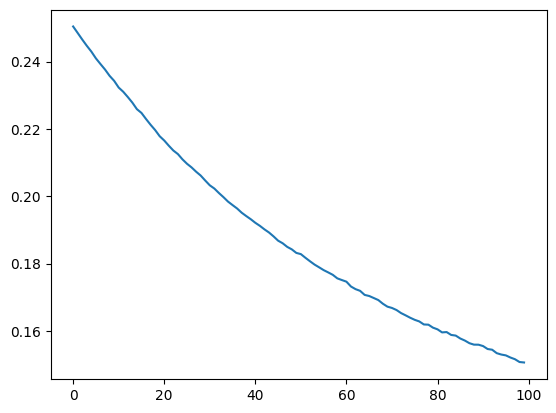

In [ ]:
plt.plot(historico.history['val_loss'])

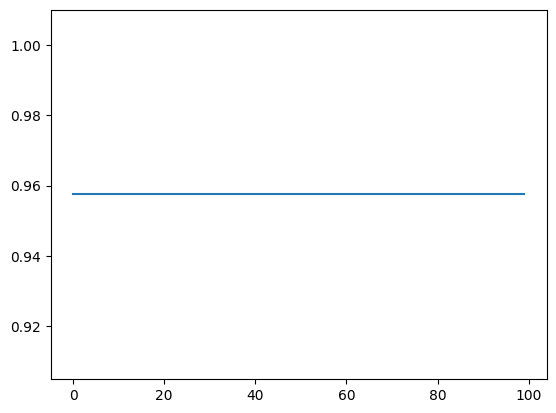

In [ ]:
plt.plot(historico.history['val_accuracy'])

In [ ]:
previsões = rede_neural.predict(X_test)
previsões

2/2 [==============================] - 0s 7ms/step


array([[9.3488550e-01],
       [9.3488550e-01],
       [9.3488550e-01],
       [6.2815166e-01],
       [6.3811898e-01],
       [9.3488550e-01],
       [9.3488550e-01],
       [9.3488550e-01],
       [7.3683930e-07],
       [9.3488550e-01],
       [9.3488550e-01],
       [9.3488550e-01],
       [9.3488550e-01],
       [1.3891522e-04],
       [5.6245750e-01],
       [9.3488550e-01],
       [9.3488550e-01],
       [8.7183480e-08],
       [3.6763126e-05],
       [9.3488550e-01],
       [6.3194078e-01],
       [9.3488550e-01],
       [9.3488550e-01],
       [4.4844106e-02],
       [9.3488550e-01],
       [2.5801003e-02],
       [1.4214294e-06],
       [9.3488550e-01],
       [9.3488550e-01],
       [8.1132661e-04],
       [9.3488550e-01],
       [9.3488550e-01],
       [1.3287253e-18],
       [9.3488550e-01],
       [2.7597882e-03],
       [3.5118473e-01],
       [3.5275868e-01],
       [7.0888156e-01],
       [5.9585512e-01],
       [5.7514709e-01],
       [6.0260415e-01],
       [9.348855

In [ ]:
previsões = (previsões > 0.5)
previsões

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True]])

In [ ]:
y_test

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True,  True, False,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
        True, False,  True,  True,  True])

from sklearn metrics import

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(previsões, y_test)

0.9152542372881356

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, previsões)
cm

array([[18,  3],
       [ 2, 36]])

<Axes: >

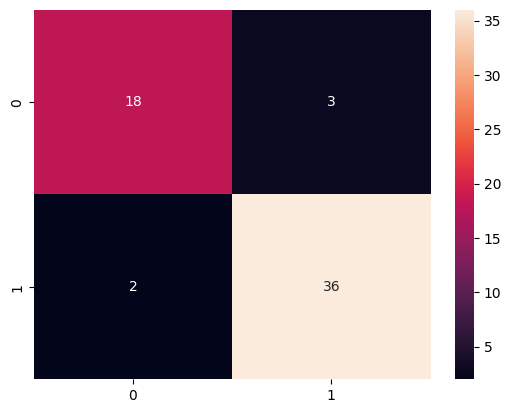

In [ ]:
sns.heatmap(cm, annot=True)
